# Nike US Sales Analysis

![Nike Header](../visuals/Image_header.jpg)

## 1. Business Problem & Objective

Nike’s overall sales performance appears strong, but regional and product-level trends may vary significantly. 
Understanding these differences is important for identifying growth opportunities, improving inventory planning, 
and guiding marketing decisions.

The objective of this analysis is to explore Nike US sales data to:
- Identify regional sales performance differences
- Examine product category contributions to total sales
- Detect patterns that may explain growth or decline across regions
- Provide data-driven recommendations based on observed trends

This project focuses on exploratory data analysis (EDA) and insight generation using sales transaction data.


In [ ]:
import pandas as pd

df = pd.read_excel("../data/Nike US Sales Datasets.xlsx")
df.head()


,Brand,Retailer ID,Invoice Date,Region,State,City,Units Sold,Operating Profit,Operating Margin,Sales Method,Product Name,Product ID
0,NIKE,1185732,2020-01-01,Northeast,New York,New York,1200,300000.0,0.50,In-store,Nike Air Force 1 '07 Essential,CJ1646-600
1,NIKE,1185732,2020-01-02,Northeast,New York,New York,1000,150000.0,0.30,In-store,Nike Air Force 1 '07,CT4328-101
2,NIKE,1185732,2020-01-03,Northeast,New York,New York,1000,140000.0,0.35,In-store,Nike Air Force 1 Sage Low LX,CI3482-200
3,NIKE,1185732,2020-01-04,Northeast,New York,New York,850,133875.0,0.35,In-store,Nike Air Max Dia SE,CD0479-200
4,NIKE,1185732,2020-01-05,Northeast,New York,New York,900,162000.0,0.30,In-store,Nike Air Max Verona,CZ6156-101


## 2. Dataset Overview

- Rows: 9648
- Columns: 12

The dataset contains 9,648 Nike US sales records across multiple regions, cities, and product categories.
Each row represents a sales entry that includes product information, location, sales volume, and profitability metrics.

The dataset includes 12 columns covering:
- Product information (Brand, Product Name, Product ID)
- Location details (Region, State, City)
- Sales metrics (Units Sold, Operating Profit, Operating Margin)
- Transaction metadata (Retailer ID, Invoice Date, Sales Method)

The `Invoice Date` column is stored as a datetime variable, indicating that the dataset captures sales activity over time.
All columns contain complete values with no missing entries, suggesting the dataset is clean and ready for exploratory analysis.

From a data type perspective:

- 7 categorical columns (object)
- 2 integer columns
- 2 floating-point columns
- 1 datetime column

The dataset occupies approximately 904 KB of memory, making it lightweight and suitable for exploratory data analysis in a notebook environment.


In [20]:
df.shape # checking the amount of rows and column
df.columns # checking the column names
df.info() # checking the daqta types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Brand             9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Units Sold        9648 non-null   int64         
 7   Operating Profit  9648 non-null   float64       
 8   Operating Margin  9648 non-null   float64       
 9   Sales Method      9648 non-null   object        
 10  Product Name      9648 non-null   object        
 11  Product ID        9648 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 904.6+ KB


## 3. Data Quality Check

Before proceeding with analysis, the dataset was inspected for missing values,
duplicate records, and structural consistency to ensure data reliability.

### Missing Values
A check for missing values showed that all columns contain complete data.
No null values were found across the dataset.

### Duplicates
Duplicate row detection confirmed that no duplicate records exist in the dataset.

### Data Types and Structure
Column data types were verified using `df.info()`. The dataset already contains
appropriate data types for analysis:

- `Invoice Date` stored as datetime
- `Units Sold` stored as integer
- `Operating Profit` stored as float
- `Operating Margin` stored as float
- Categorical fields stored as object

Since the dataset is already well-structured and complete, no major data cleaning
steps were required prior to exploratory data analysis.

In [29]:
df.isnull().sum() # checking for nulls

Brand               0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Units Sold          0
Operating Profit    0
Operating Margin    0
Sales Method        0
Product Name        0
Product ID          0
dtype: int64

In [27]:
df.duplicated().sum() # checking for duplicates

np.int64(0)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Brand             9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Units Sold        9648 non-null   int64         
 7   Operating Profit  9648 non-null   float64       
 8   Operating Margin  9648 non-null   float64       
 9   Sales Method      9648 non-null   object        
 10  Product Name      9648 non-null   object        
 11  Product ID        9648 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 904.6+ KB


In [ ]:
(df["Units Sold"] < 0).sum() # check for negative sales

np.int64(0)

In [39]:
(df["Operating Profit"] < 0).sum() # check for negative operating profit

np.int64(0)

In [ ]:
df["Invoice Date"].min(), df["Invoice Date"].max() # checking for range

(Timestamp('2020-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

## 4. Exploratory Data Analysis

This analysis aims to understand sales performance across regions and product categories by answering the following questions:

- Which regions generate the highest sales volume and profit?
- How does product mix vary across regions?
- Which products contribute most to operating profit?
- Are there differences in performance between sales methods?
- How do sales trends evolve over time?

### 4.1 Sales by Region

To understand regional performance differences, total units sold and
operating profit were aggregated by region. This helps identify
high-performing and underperforming areas.


In [ ]:
# Tabulating the regions sales first to get a reference

region_sales = df.groupby("Region").agg({
    "Units Sold": "sum",
    "Operating Profit": "sum"
}).sort_values("Operating Profit", ascending=False)

region_sales

,Units Sold,Operating Profit
Region,,
West,686985,89609406.55
Northeast,501279,68020587.65
South,492260,61138004.07
Southeast,407000,60555416.70
Midwest,391337,52811346.48


<Axes: title={'center': 'Operating Profit by Region'}, xlabel='Region'>

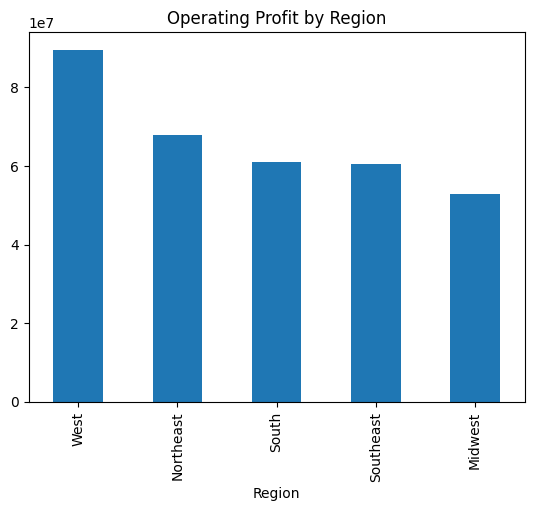

In [46]:
region_sales["Operating Profit"].plot(kind="bar", title="Operating Profit by Region")

Regional performance varies significantly across the dataset.
Some regions contribute a disproportionately higher share of operating profit,
while others lag behind despite having sales activity.

This suggests opportunities for targeted marketing strategies,
inventory adjustments, or product positioning improvements
in lower-performing regions.


### 4.2 Profit by State Analysis

In [65]:
import pandas as pd
import plotly.express as px


# Hard coding the abbreviation mapping
state_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE",
    "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC",
    "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR",
    "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

# Create abbrev column from the existing "State" column
df["state_abbrev"] = df["State"].map(state_abbrev)

# Check if any states failed to map (important!)
unmapped = df.loc[df["state_abbrev"].isna(), "State"].unique()
print("Unmapped states:", unmapped)

# Aggregate for choropleth
state_summary = df.groupby("state_abbrev", as_index=False).agg({
    "Operating Profit": "sum",
    "Units Sold": "sum"
})

fig = px.choropleth(
    state_summary,
    locations="state_abbrev",
    locationmode="USA-states",
    color="Operating Profit",
    scope="usa",
    title="Operating Profit by State"
)

fig.show()


Unmapped states: []


The choropleth map shows that California, Texas, Florida, and New York generate the highest operating profit. These states likely reflect larger retail markets and higher transaction volumes. Lower-profit states may represent smaller markets or fewer retail locations.

The profit-per-unit analysis reveals a different pattern compared to total operating profit.
While large and economically strong states such as California, Texas, and New York generate
high overall profit due to sales volume, they do not necessarily achieve the highest profit efficiency.

Colorado shows the highest profit per unit (≈186), indicating strong margin performance despite
not being among the top states in total operating profit. Michigan also demonstrates strong
profit efficiency (≈162), followed by Florida (≈156). In contrast, Utah records one of the lowest
profit-per-unit values (≈79), suggesting lower margins or less profitable product sales.

This contrast highlights the difference between **sales scale and profitability efficiency**.
High-volume markets drive total profit, while smaller markets may achieve stronger margins
through pricing strategy, product mix, or sales channel differences.

Evaluating both total operating profit and profit per unit provides a more complete understanding
of regional sales performance.


In [64]:
state_summary["Profit Metrics"] = (
    state_summary["Operating Profit"] / state_summary["Units Sold"]
)

px.choropleth(
    state_summary,
    locations="state_abbrev",
    locationmode="USA-states",
    color="Profit Metrics",
    scope="usa",
    title="Profit per Unit by State"
)



The profit-per-unit analysis reveals a different pattern compared to total operating profit.
While large and economically strong states such as California, Texas, and New York generate
high overall profit due to sales volume, they do not necessarily achieve the highest profit efficiency.

Colorado shows the highest profit per unit (≈186), indicating strong margin performance despite
not being among the top states in total operating profit. Michigan also demonstrates strong
profit efficiency (≈162), followed by Florida (≈156). In contrast, Utah records one of the lowest
profit-per-unit values (≈79), suggesting lower margins or less profitable product sales.

This contrast highlights the difference between **sales scale and profitability efficiency**.
High-volume markets drive total profit, while smaller markets may achieve stronger margins
through pricing strategy, product mix, or sales channel differences.

Evaluating both total operating profit and profit per unit provides a more complete understanding
of regional sales performance.


### 4.3 Product Mix Comparison

<Axes: title={'center': 'Top Products by Operating Profit'}, ylabel='Product Name'>

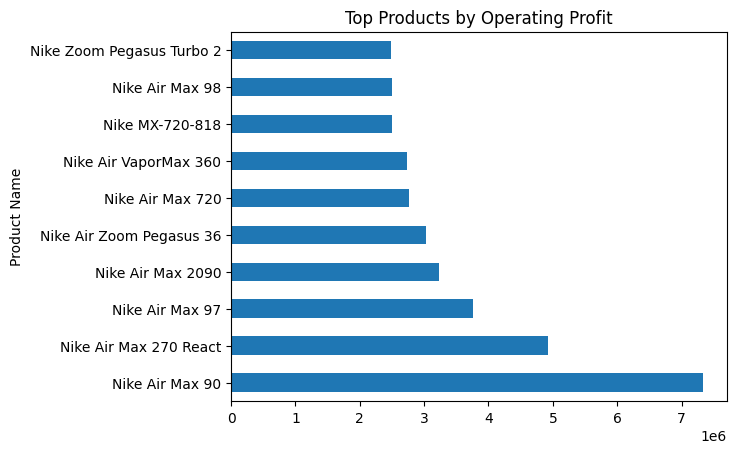

In [ ]:
top_products = df.groupby("Product Name")["Operating Profit"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="barh", title="Top Products by Operating Profit")

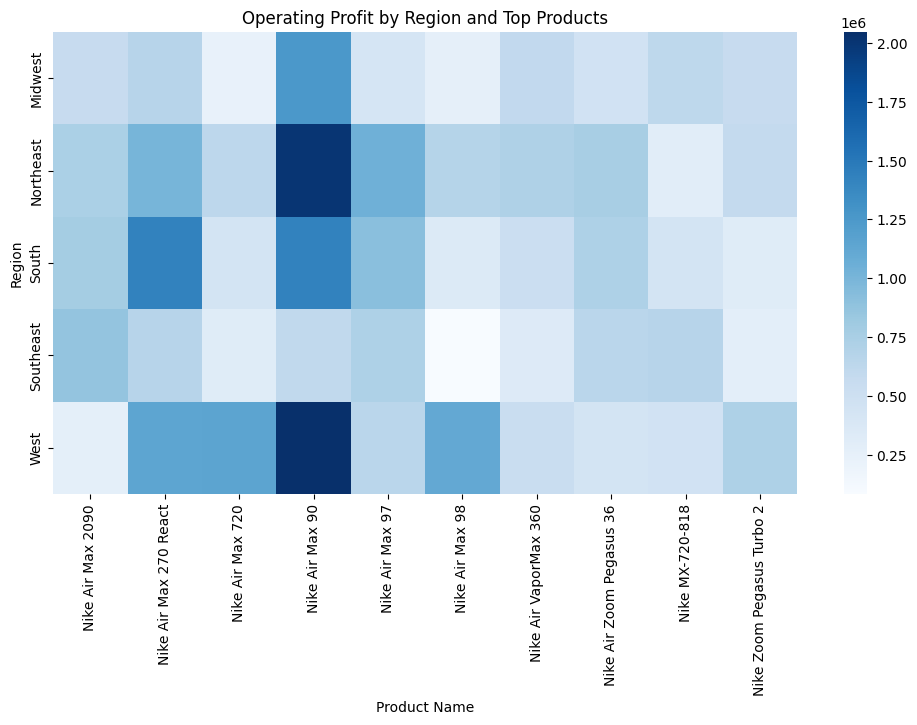

In [70]:
top_product_names = top_products.index

pivot = pd.pivot_table(
    df[df["Product Name"].isin(top_product_names)],
    values="Operating Profit",
    index="Region",
    columns="Product Name",
    aggfunc="sum"
).fillna(0)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Blues")
plt.title("Operating Profit by Region and Top Products")
plt.show()

## 5. Key Insights

## 6. Recommendations

## 7. Limitations & Next Steps